In [13]:
#import packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import HDBSCAN
from umap import UMAP
import matplotlib.pyplot as plt
from sentence_transformers import SentenceTransformer

In [14]:
# load data
url = "https://storage.googleapis.com/superlinked-notebook-user-acquisiton-analytics/user_acquisiton_data.csv"
data = pd.read_csv(url)

In [15]:
# text vectorization
model = SentenceTransformer('all-MiniLM-L6-v2')
ad_creatives = data['ad_creative'].values
text_embeddings = model.encode(ad_creatives)

In [16]:
# prepare numerical data
numerical_features = data[['signup_date', 'activity']]
scaler = StandardScaler()
scaled_numerical_features = scaler.fit_transform(numerical_features)

In [17]:
#numerical and text vertices merge
features = np.concatenate((text_embeddings, scaled_numerical_features), axis=1)

In [21]:
# HDBSCAN clustering
hdbscan = HDBSCAN(min_cluster_size=700, min_samples=15)
cluster_labels = hdbscan.fit_predict(features)

In [22]:
# UMAP dimension reduction
umap = UMAP(n_components=2, random_state=42)
umap_result = umap.fit_transform(features)

C:\Users\Márk\AppData\Roaming\Python\Python39\site-packages\umap\umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


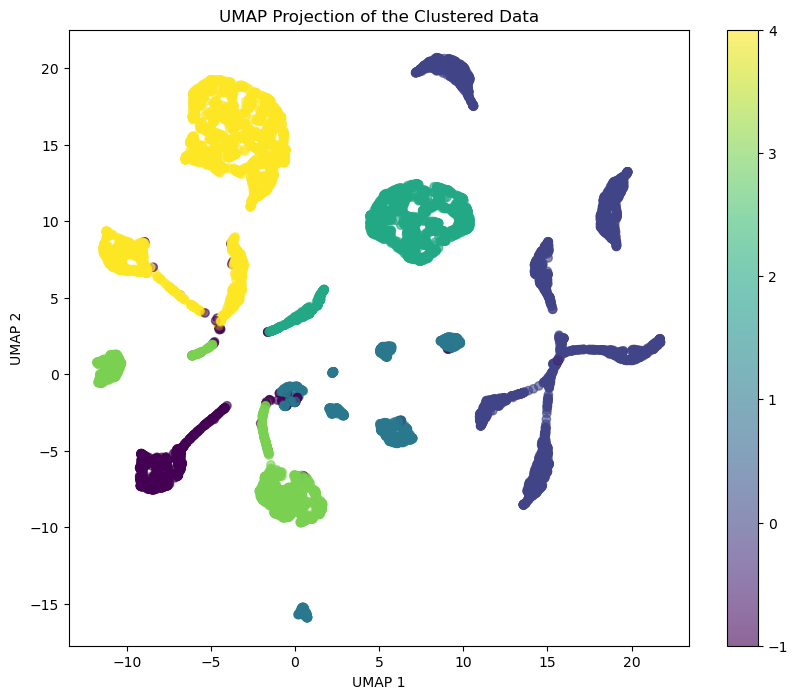

In [23]:
# visualization
plt.figure(figsize=(10, 8))
plt.scatter(umap_result[:, 0], umap_result[:, 1], c=cluster_labels, cmap='viridis', alpha=0.6)
plt.colorbar()
plt.title('UMAP Projection of the Clustered Data')
plt.xlabel('UMAP 1')
plt.ylabel('UMAP 2')
plt.show()